In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import fcnoutlier as fno

%matplotlib inline

# OCSVM for Groundstate

# datapoints 0.00 above 68976
# datapoints 0.10 above 68976
# datapoints 0.20 above 67734
# datapoints 0.30 above 41532
# datapoints 0.40 above 17193
# datapoints 0.50 above 7264
# datapoints 0.60 above 2942
# datapoints 0.70 above 1128
# datapoints 0.80 above 354
# datapoints 0.90 above 86
# datapoints 1.00 above 0


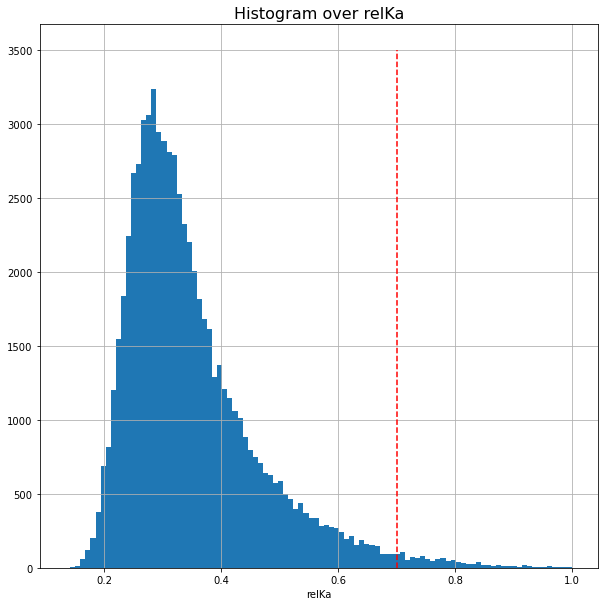

In [5]:
data = pd.read_csv('../data/groundstate/GSM1586782_ScrWT_Exd_14mer_cg_gs.txt')
fno.plot_hist(data)
fno.get_info(data)

In [6]:
data.head()

0       1       2       3       4       5       6       7       8  \
0  0.5937 -1.0928  0.3091  0.1335  0.0234 -0.1573  1.1776 -2.1669 -1.0597   
1  0.7579 -0.9306  0.4336  0.1464  0.0422  0.1382  1.9960 -2.8763 -1.2720   
2  0.9131 -0.0502  0.1435 -0.2230  0.0185  0.1503  1.6645 -2.7911 -1.2134   
3 -0.3780 -0.1196  0.1434 -0.2003 -0.0002  0.2588  0.8343 -1.6067 -0.3784   
4  1.1079 -1.0823  0.3309  0.1205  0.0367 -0.0686  1.0450 -2.0403 -0.8358   

        9  ...     309      310     311     312     313     314     315  \
0 -0.9869  ... -0.8478  10.0220 -1.6137 -0.7579 -0.9306  0.4336 -0.1464   
1 -0.8478  ... -0.9869   9.8511 -1.9902 -0.5937 -1.0928  0.3091 -0.1335   
2 -0.9093  ... -1.2501   9.9327 -1.6506  0.3780 -0.1196  0.1434  0.2003   
3 -1.2501  ... -0.9093   9.9149 -1.6203 -0.9131 -0.0502  0.1435  0.2230   
4 -1.1169  ... -0.9607   9.9440 -1.8061  0.3364 -0.5966  0.1841 -0.0753   

      316     317     Label  
0  0.0422  0.1382  1.000000  
1  0.0234 -0.1573  1.000000  
2 -0.0002  0.2588  0.993002  
3  0.0185  0.1503  0.993002  
4  0.0328  0.1491  0.991536  

[5 rows x 319 columns]

In [7]:
# encode class
fno.get_class(data)
# normalize data
data_sc = fno.get_normal(data,feature=1)
# split data
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
# cal contermination
perc = fno.get_prec(data_sc)
# get trained model
ocsvm = fno.get_ocsvm(train_data,perc=perc)
# evaluate the model
y_pred, n_errors = fno.get_eval(ocsvm,test_data,y_test)
# look at the prediction 
data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
fno.get_results(y_pred,y_test)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(array([[13454,  1120],
        [  116,     8]]),
 0.0070921985815602835,
 0.06451612903225806,
 0.012779552715654952)

# OCSVM for Stiffness

# datapoints 0.00 above 68976
# datapoints 0.10 above 68976
# datapoints 0.20 above 67734
# datapoints 0.30 above 41532
# datapoints 0.40 above 17193
# datapoints 0.50 above 7264
# datapoints 0.60 above 2942
# datapoints 0.70 above 1128
# datapoints 0.80 above 354
# datapoints 0.90 above 86
# datapoints 1.00 above 0


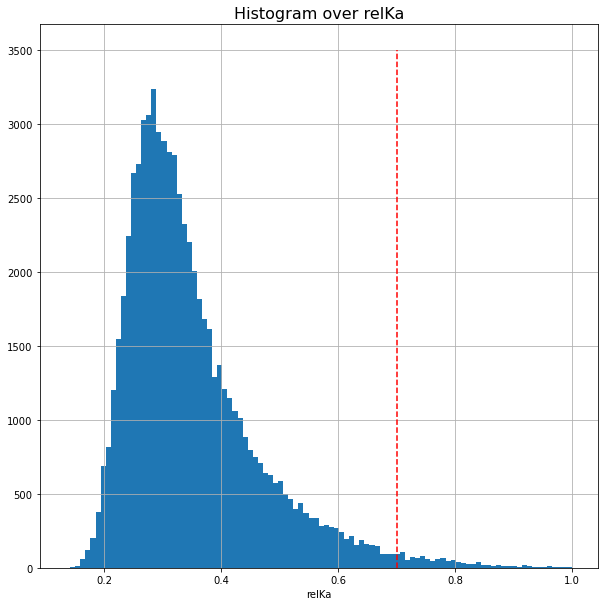

In [11]:
data = pd.read_csv('../data/stiffness/GSM1586782_ScrWT_Exd_14mer_cg_eigs.txt')
fno.plot_hist(data)
fno.get_info(data)

In [12]:
# encode class
fno.get_class(data)
# normalize data
data_sc = fno.get_normal(data,feature=1)
# split data
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
# cal contermination
perc = fno.get_prec(data_sc)
# get trained model
ocsvm = fno.get_ocsvm(train_data,perc=perc)
# evaluate the model
y_pred, n_errors = fno.get_eval(ocsvm,test_data,y_test)
# look at the prediction 
data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
fno.get_results(y_pred,y_test)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(array([[13415,  1120],
        [  155,     8]]),
 0.0070921985815602835,
 0.049079754601226995,
 0.012393493415956622)

# OCSVM for GS and Stiffness

In [46]:
data_stiff = pd.read_csv('../data/stiffness/GSM1586782_ScrWT_Exd_14mer_cg_eigs.txt')
data_gs = pd.read_csv('../data/groundstate/GSM1586782_ScrWT_Exd_14mer_cg_gs.txt')
data = pd.concat([data_stiff.loc[:,data_stiff.columns[:-1]],data_gs],axis=1)
data.head()

0         1         2         3         4         5         6  \
0  378.5059  354.3246  343.0092  322.7451  315.0554  302.9229  291.4958   
1  378.5059  354.3246  343.0092  322.7451  315.0554  302.9229  291.4958   
2  394.3406  377.1635  347.3336  340.6967  305.2323  295.5046  294.0920   
3  394.3406  377.1635  347.3336  340.6967  305.2323  295.5046  294.0920   
4  379.1068  360.6349  346.5670  310.7490  306.9875  293.0691  290.1991   

          7         8         9  ...     309      310     311     312     313  \
0  290.0220  269.9165  260.2195  ... -0.8478  10.0220 -1.6137 -0.7579 -0.9306   
1  290.0220  269.9165  260.2195  ... -0.9869   9.8511 -1.9902 -0.5937 -1.0928   
2  288.9470  260.0877  256.0891  ... -1.2501   9.9327 -1.6506  0.3780 -0.1196   
3  288.9470  260.0877  256.0891  ... -0.9093   9.9149 -1.6203 -0.9131 -0.0502   
4  267.9398  257.9764  246.4411  ... -0.9607   9.9440 -1.8061  0.3364 -0.5966   

      314     315     316     317     Label  
0  0.4336 -0.1464  0.0422  0.1382  1.000000  
1  0.3091 -0.1335  0.0234 -0.1573  1.000000  
2  0.1434  0.2003 -0.0002  0.2588  0.993002  
3  0.1435  0.2230  0.0185  0.1503  0.993002  
4  0.1841 -0.0753  0.0328  0.1491  0.991536  

[5 rows x 635 columns]

In [47]:
# encode class
fno.get_class(data)
# normalize data
data_sc = fno.get_normal(data,feature=1)
# split data
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
# cal contermination
perc = fno.get_prec(data_sc)
# get trained model
ocsvm = fno.get_model(train_data,perc=perc)
# evaluate the model
y_pred, n_errors = fno.get_eval(ocsvm,test_data,y_test)
# look at the prediction 
data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
fno.get_results(y_pred,y_test)

/home/jate1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[13431  1124]
 [  139     4]]
0.006294256490952005


(array([[13431,  1124],
        [  139,     4]]),
 0.0035460992907801418,
 0.027972027972027972,
 0.006294256490952005,
 None)

# Reduced dataset

In [62]:
data_stiff = pd.read_csv('../data/stiffness/GSM1586782_ScrWT_Exd_14mer_cg_eigs.txt')
data_gs = pd.read_csv('../data/groundstate/GSM1586782_ScrWT_Exd_14mer_cg_gs.txt')
#data = pd.concat([data_stiff.loc[:,data_stiff.columns[:-1]],data_gs],axis=1)
#data.head()
data_stiff = data_stiff.loc[:,data_stiff.columns[:-1]]

In [64]:
fno.get_class(data_gs)
data_sc = get_normal(data_gs, feature=0)
data_sc['stiff_max'] = data_stiff.max(axis=1)
data_sc['stiff_min'] = data_stiff.min(axis=1)
data_sc['stiff_mean'] = data_stiff.mean(axis=1)
data_sc['stiff_var'] = data_stiff.var(axis=1)
data_sc['stiff_median'] = data_stiff.median(axis=1)
data_sc['stiff_sum'] = data_stiff.sum(axis=1)

In [65]:
data_sc.head()

0         1         2         3         4         5         6  \
0  0.592252 -1.211382  1.404174  1.290327 -0.386310 -2.197014 -0.257783   
1  0.914450 -0.824520  2.626450  1.369294  0.601071  0.321579  1.311538   
2  1.218987  1.275317 -0.221600 -0.891977 -0.643659  0.424709  0.675871   
3 -1.314440  1.109791 -0.222582 -0.753019 -1.625789  1.349472 -0.916078   
4  1.601228 -1.186339  1.618195  1.210748  0.312210 -1.441010 -0.512050   

          7         8         9  ...       315       316       317  Class  \
0  1.429582  0.681320 -0.755527  ... -1.369294  0.601071  0.321579      1   
1  0.267259  0.165120 -0.248311  ... -1.290327 -0.386310 -2.197014      1   
2  0.406855  0.307604 -0.472565  ...  0.753019 -1.625789  1.349472      1   
3  2.347447  2.337876 -1.715261  ...  0.891977 -0.643659  0.424709      1   
4  1.637011  1.225725 -1.229560  ... -0.934057  0.107381  0.414482      1   

   stiff_max  stiff_min  stiff_mean    stiff_var  stiff_media   stiff_sum  
0   378.5059     0.0662   39.456825  4721.697389      8.19475  12468.3566  
1   378.5059     0.0662   39.456825  4721.697389      8.19475  12468.3566  
2   394.3406     0.0661   40.482159  4960.583308      8.10875  12792.3622  
3   394.3406     0.0661   40.482159  4960.583308      8.10875  12792.3622  
4   379.1068     0.0662   39.600987  4658.564604      8.12445  12513.9119  

[5 rows x 325 columns]

In [66]:
train_data, test_data, y_test, tfbs = fno.get_testdata(data_sc)
# cal contermination
perc = fno.get_prec(data_sc)
# get trained model
ocsvm = fno.get_ocsvm(train_data,perc=perc)
# evaluate the model
y_pred, n_errors = fno.get_eval(ocsvm,test_data,y_test)
# look at the prediction 
data.loc[test_data[y_pred == -1].index,'Class']
# calculate confusion matrix
fno.get_results(y_pred,y_test)

/home/jate1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[[13429  1124]
 [  141     4]]
0.006284367635506678


(array([[13429,  1124],
        [  141,     4]]),
 0.0035460992907801418,
 0.027586206896551724,
 0.006284367635506678,
 None)